In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os, sys
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import geopandas as gpd
import shapely
from tqdm import tqdm, tqdm_notebook

sys.path.append('../src/')
import loadpaths
path_dict_pecl = loadpaths.loadpaths()
import data_utils as du 
import gee_utils as gu

In [3]:
df_s2bms_presence = du.load_s2bms_presence()

In [4]:
tmp = gu.get_lc_from_coord(df_s2bms_presence.tuple_coords[0])

In [49]:
geemap.ee_export_image(
        tmp, filename='tmp.tif', 
        scale=10,  # 10m bands
        file_per_band=False,# crs='EPSG:32630'
    )

Generating URL ...
Please wait ...
Data downloaded to /Users/tplas/repos/aether/notebooks/tmp.tif


In [50]:
tmp_im = du.load_tiff('tmp.tif')

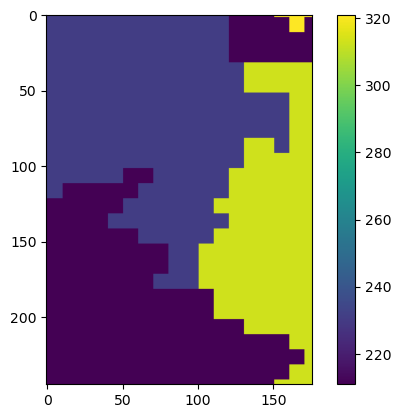

In [61]:
plt.imshow(tmp_im[0,...])
plt.colorbar()

In [ ]:
gu.get_bioclim_lc_from_coords_list(coords_list=df_s2bms_presence.tuple_coords.values,
                                   name_list=df_s2bms_presence.name_loc.values,
                                   save_file=True, save_filename='s2bms_bioclim_lc_data.csv')

In [28]:
df_bioclim_lc = pd.read_csv('../outputs/s2bms_bioclim_lc_data.csv')
df_bioclim_lc

,bioclim_01,bioclim_02,bioclim_03,bioclim_04,bioclim_05,bioclim_06,bioclim_07,bioclim_08,bioclim_09,bioclim_10,...,corine_frac_421,corine_frac_422,corine_frac_423,corine_frac_511,corine_frac_512,corine_frac_521,corine_frac_522,corine_frac_523,coords,name
0,8.9,7.4,36.0,46.46,20.5,0.1,20.4,4.3,13.5,15.1,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,"(-2.165105, 50.956811)",UKBMS_loc-0000
1,8.9,6.9,34.0,46.81,20.3,0.4,19.9,4.2,10.7,15.2,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,"(-2.646667, 50.775285)",UKBMS_loc-0001
2,9.6,7.7,35.0,48.92,21.5,0.0,21.5,4.4,14.5,16.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,"(-0.828484, 50.888106)",UKBMS_loc-0002
3,10.0,7.6,38.0,43.71,21.0,1.3,19.7,5.7,14.1,15.7,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.216571,"(-1.966038, 50.59722)",UKBMS_loc-0003
4,9.8,7.4,34.0,48.53,21.2,-0.1,21.3,16.0,4.3,16.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,"(-0.229941, 52.409243)",UKBMS_loc-0004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1324,9.4,7.6,34.0,51.37,21.8,-0.5,22.3,6.4,5.6,16.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,"(-0.751089, 51.651648)",UKBMS_loc-2206
1325,9.4,7.1,36.0,45.74,20.3,0.8,19.5,4.7,11.2,15.4,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,"(-1.872219, 53.869641)",UKBMS_loc-2209
1326,9.1,7.2,36.0,46.17,20.2,0.6,19.6,4.4,13.8,15.2,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,"(-1.619057, 53.275874)",UKBMS_loc-2223
1327,10.0,7.6,38.0,44.06,21.1,1.4,19.7,5.7,14.2,15.8,...,0.167309,0.0,0.0,0.0,0.0,0.0,0.0,0.119694,"(-2.036753, 50.687147)",UKBMS_loc-2226
